<a href="https://colab.research.google.com/github/SuzyYiXu/datasharing/blob/master/Suzy_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# My research questions tackled in this notebook 

**[Summary of data]**

My dataset is about global plastic pollution gathered by Soham Gade from Our World in Data. The dataset contains 5 data frames that describe:
1. global plastic production from year 1950 to 2015,
2. mismanaged waste of various countries in 2010,
3. per capita plastic waste of various countries in 2010,
4. per capita plastic waste, GDP per capita, and total population of various countries from 1800 to 2019, and
5. per capita mismanaged plastic waste, GDP per capita, and total population of various countries from 1800 to 2019.

**[My hypothesis]**

i. Global plastic production is increasing each year.\
ii. Per capita plastic waste correlates positively with GDP per capita.\
iii. Per capita plastic waste correlates positively with total population of a country. \
iv. Per capita mismanaged plastic waste correlates negatively with GDP per capita.\
v. Per capita mismanaged plastic waste correlates positively with total population
of a country.



In [ ]:
# Load the dataset downloaded from Kaggle


df1<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/global_plastic_pollution/global-plastics-production.csv', na.strings=c("unknown",0))
df2<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/global_plastic_pollution/mismanaged-waste-global-total.csv', na.strings=c("unknown",0))
df3<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/global_plastic_pollution/plastic-waste-per-capita.csv', na.strings=c("unknown",0))
df4<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/global_plastic_pollution/per-capita-plastic-waste-vs-gdp-per-capita.csv', na.strings=c("unknown",0))
df5<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/global_plastic_pollution/per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv', na.strings=c("unknown",0))



In [ ]:
# eliminate 0 or NA values
df4<-na.omit(df4)
df5<-na.omit(df5)

In [ ]:
# Define a function for describing variables
describe_df <- function(df) {
variables <- colnames(df)
(variables)
find_mode <- function(x) {
      u <- unique(x)
      tab <- tabulate(match(x, u))
      u[tab == max(tab)]
      }
for (v in variables) 
{
  dat_column <- unlist(df[v]) 
  if (typeof(dat_column) == 'integer')
  {mode <- find_mode(dat_column)
   message(v, ': ', min(unlist(df[v])), ' and ', max(unlist(df[v])), ' are its min and max value, with ', mode, 
   ' being the most common value' )
} else if (typeof(dat_column) == 'double')
   { message(v, ': ', 'its mean and interquartile range are ', mean(unlist(df[v])), ' and ', IQR(unlist(df[v]), na.rm=T), ", respectively") 
} else if (typeof(dat_column) == 'character') 
{  uni <- unique(unlist(df[v]))
   length_u <- length(uni)
     if (length_u < 3) 
      { 
        cat(v, ': ', length_u, ' example values are ', uni, '\n' )
      } else
      { cat(v, ': ', length_u/2, ' example values are ', uni[1:(length_u/2)], '\n')
      } 
} else
{  message(v, '(not numeric nor character type)') 
}
}

}

In [ ]:
# call function
t1<-read.csv('https://www.dropbox.com/s/vp44yozebx5xgok/bdiag.csv?dl=1')
#t2<-read.csv('https://raw.githubusercontent.com/ALY6000/datasets/main/kaggle/train.csv')

describe_df(t1)

id: 8670 and 911320502 are its min and max value, with 842302842517843009038434830184358402843786844359844582028449818450100184563684610002846226846381846674018479900284840684862001849014851042685106538510824851113385150985255285263185276385278185297385320185340185361285382601854002854039854253854268854941855133855138855167855563855625856106856385028570108571370285715857155857156857343857373857374857392857438857599028576378577938578108584778589708589818589868591968592230285928385946485946585947185948785957585971185971785998386101758610404861062986106378610862861090886110386111618611555861179286120808612399861355018613550286159786159886164886179986185386200986202886208862118622618624858625488627178627228629658629808629898630308630318632708635586401886403386408864098642928644968646858647268647298648778651288651378651786542386543286546886561866083866203866458866674866714867086730502867387867739868202868223868682868826868871868999869104869218869224869254869476869691869737018697370286993187

diagnosis :  2  example values are  M B 


radius_mean: its mean and interquartile range are 14.1272917398946 and 4.08, respectively

texture_mean: its mean and interquartile range are 19.2896485061511 and 5.63, respectively

perimeter_mean: its mean and interquartile range are 91.9690333919156 and 28.93, respectively

area_mean: its mean and interquartile range are 654.889103690685 and 362.4, respectively

smoothness_mean: its mean and interquartile range are 0.0963602811950791 and 0.01893, respectively

compactness_mean: its mean and interquartile range are 0.104340984182777 and 0.06548, respectively

concavity_mean: its mean and interquartile range are 0.0887993158172232 and 0.10114, respectively

concave.points_mean: its mean and interquartile range are 0.0489191458699473 and 0.05369, respectively

symmetry_mean: its mean and interquartile range are 0.181161862917399 and 0.0338, respectively

fractal_dimension_mean: its mean and interquartile range are 0.0627976098418278 and 0.00842, respectively

radius_se: its mean and in

# High-level description of the dataset
The dataset contains useful information about global plastic production and mismanagement. Data points are organized and variables are easy to understand. The only drawback is the existence of considerable amount of outliers, which needs to be examine closely further.

# What is the data saying to us and how I gathered that?
From descriptive analysis, the data is telling me that global plastic production is increasing from year 1950 to 2015.


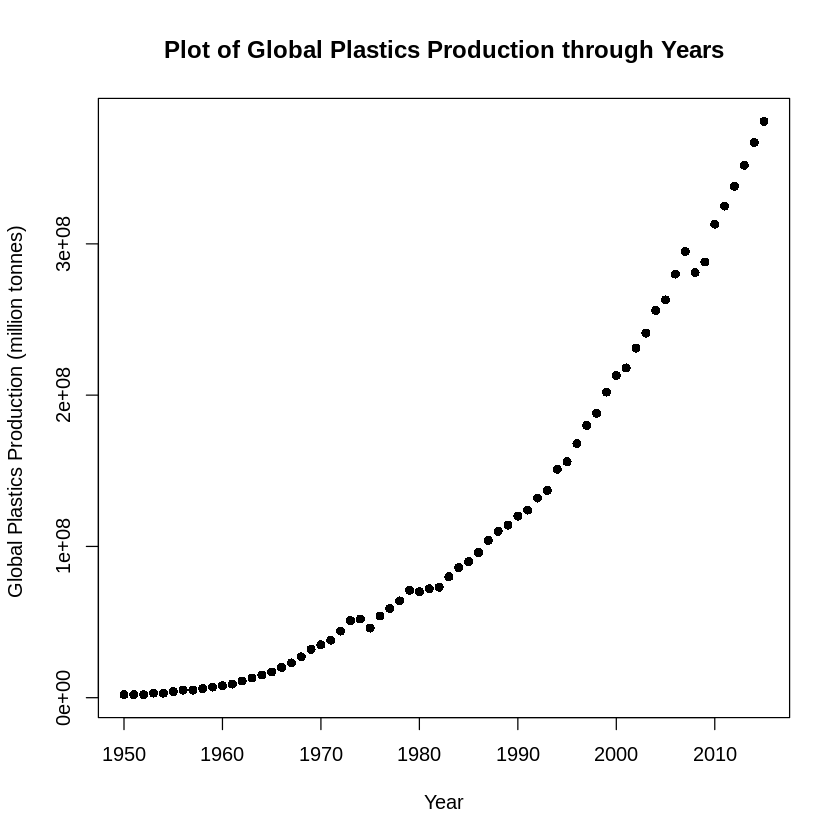

In [ ]:
# show the trend of global plastics production: generally increasing from 1950 to 2015
gpp1 <- df1$Global.plastics.production..million.tonnes.
yr1 <- df1$Year
plot(yr1, gpp1, pch=16, xlab = "Year", ylab = "Global Plastics Production (million tonnes) ", 
main='Plot of Global Plastics Production through Years')

There are also big differences among countries in terms of how much plastic produced and mismanaged as a country, and how much plastic produced per capita.

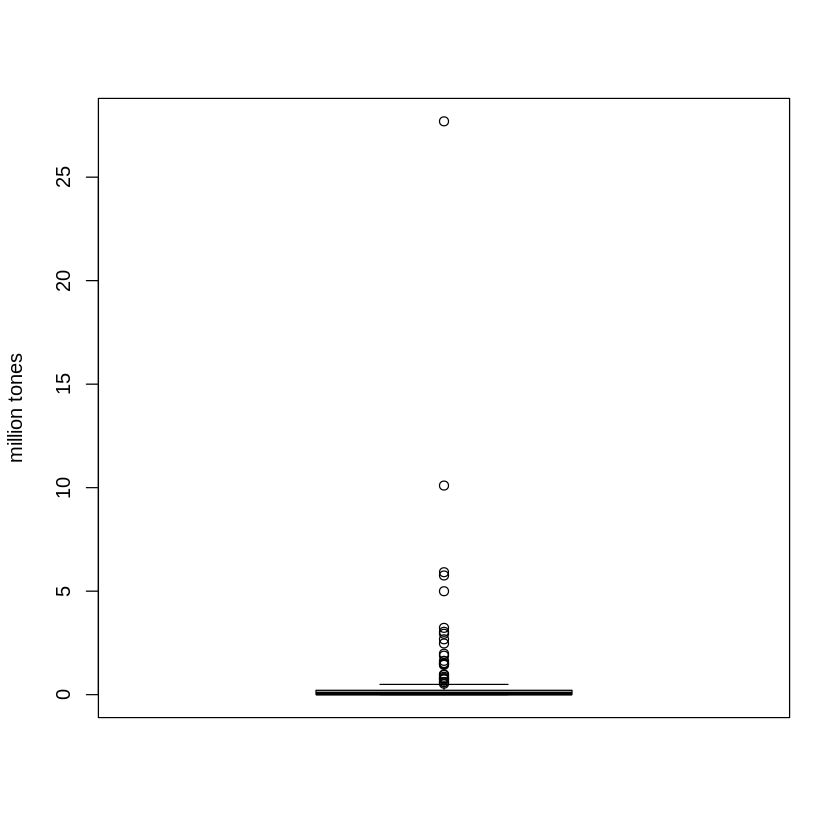

In [ ]:
# show boxplot of mismanaged waste to see the distribution of its values
mw2 <- df2$Mismanaged.waste....global.total.
boxplot(mw2, ylab ='million tones')

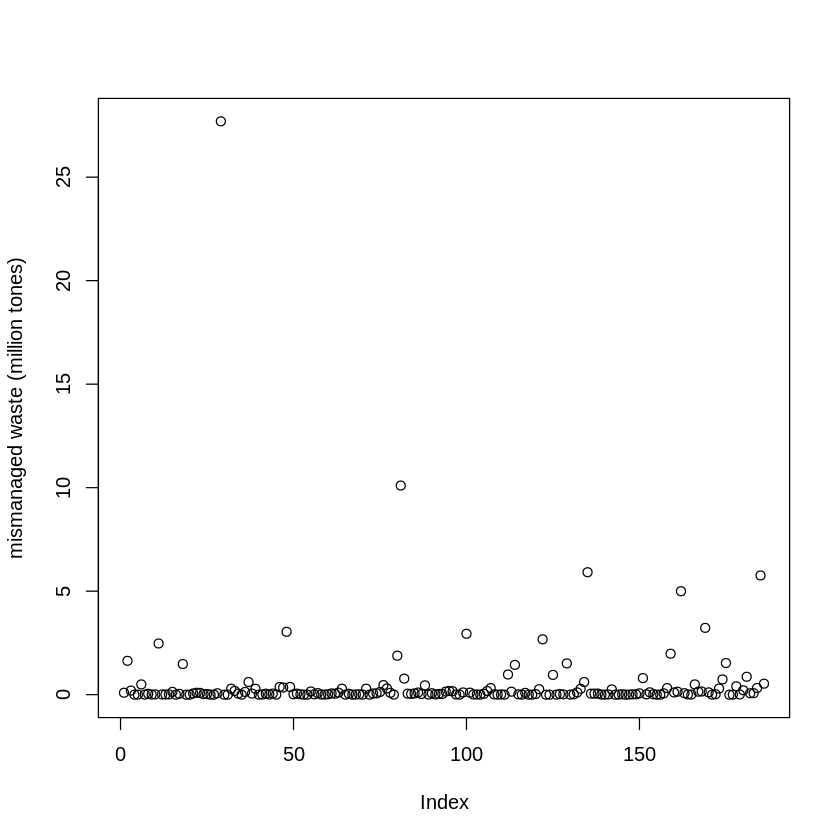

In [ ]:
# plot mismanaged waste (mw2) to take a close look at the outliers
plot(mw2, ylab = 'mismanaged waste (million tones)')

# My findings about specific attributes

From the graph, we learn that, in general, the speed of global plastic production
is increasing from year 1950 to 2015.

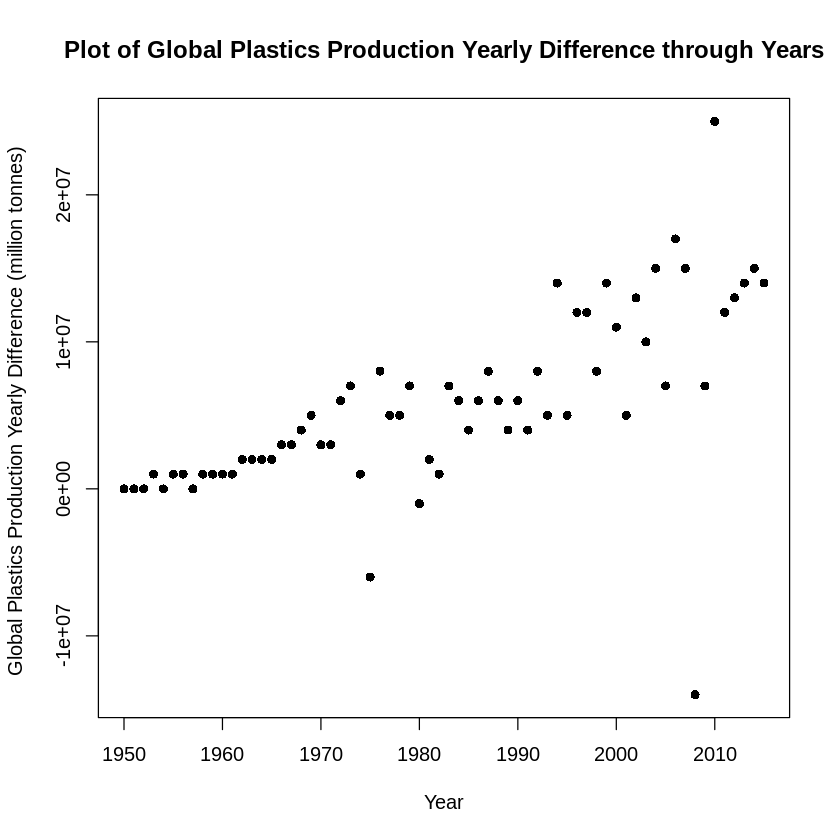

In [ ]:
# calculate the difference between global plastics productions of neighbouring 2 years
Diff <- diff(df1$Global.plastics.production..million.tonnes., 1)
# Edit Diff to make it the same length as df1$Year
Diff <- c(0,Diff)
# plot year vs Diff
plot(df1$Year, Diff, pch=16,  xlab = "Year", ylab = "Global Plastics Production Yearly Difference (million tonnes) ", 
main='Plot of Global Plastics Production Yearly Difference through Years')

# What could be answered confidently? And What not? Why?
Overall, global plastic production was increasing from year 1950 to 2015.\
Countries with high GDP tend to mismanaged less plastic waste per person.


In [ ]:
# rename variables
gdppc4 <- df4$GDP.per.capita..PPP..constant.2011.international...
pcpw4 <- df4$Per.capita.plastic.waste..kg.person.day.
tp4 <- df4$Total.population..Gapminder..HYDE...UN.
pcmpw5 <- df5$Per.capita.mismanaged.plastic.waste
gdppc5 <- df5$GDP.per.capita..PPP..constant.2011.international...
tp5 <- df5$Total.population..Gapminder..HYDE...UN.


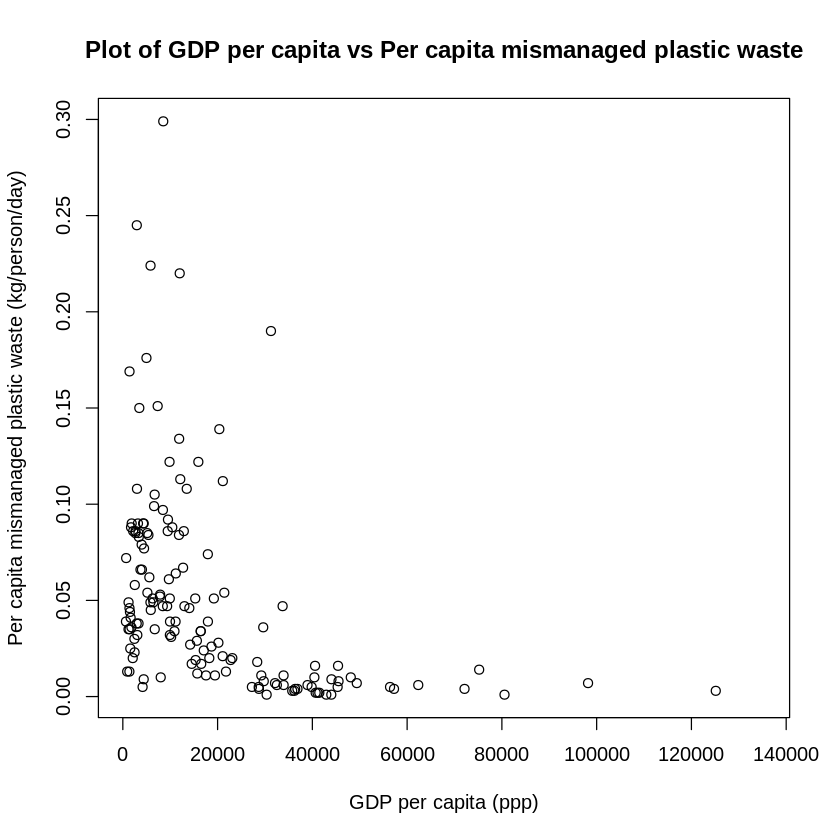

In [ ]:
# plot gdppc5 against pcmpw5 to see if one variable correlates to another
plot(gdppc5, pcmpw5, xlab = "GDP per capita (ppp)", ylab = "Per capita mismanaged plastic waste (kg/person/day)", 
main = "Plot of GDP per capita vs Per capita mismanaged plastic waste")


From our plot and descriptive analysis, we could not conclude if there is a correlation between GDP per capita and per capita plastic waste.


Call:
lm(formula = gdppc4 ~ pcpw4)

Coefficients:
(Intercept)        pcpw4  
       9866        52413  


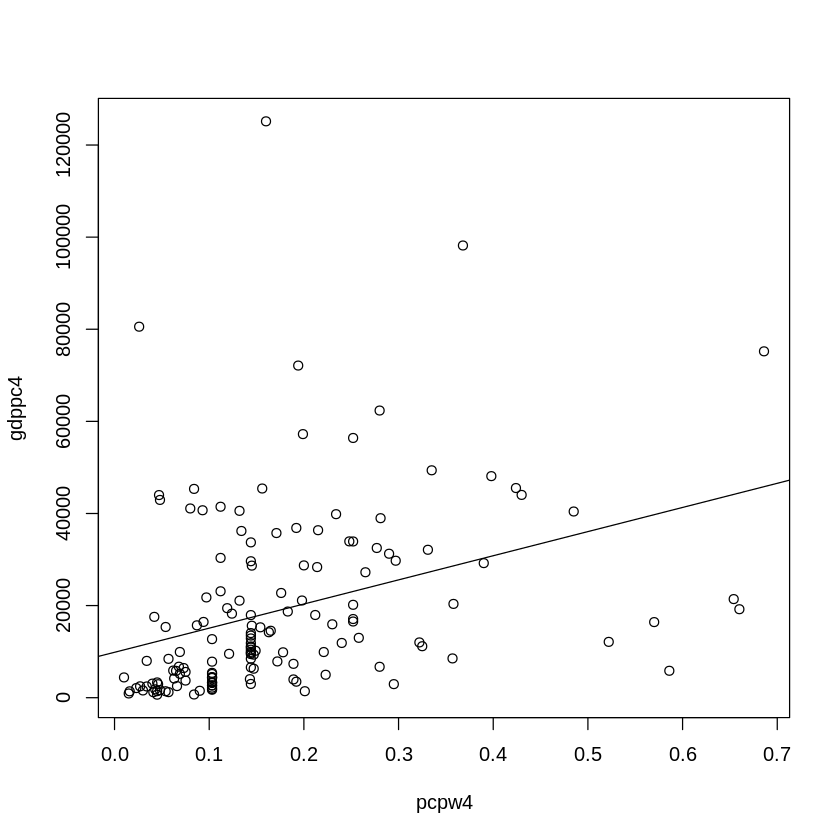

In [ ]:
# plot gdppc4 against pcpw4 to see if one variable correlates to another
#plot(gdppc4, pcpw4, xlab = "GDP per capita (ppp)", ylab = "Per capita plastic waste (kg/person/day)", main = "Plot of GDP per capita vs Per capita plastic waste")
# fit a linear regression line to the dataset
fit <- lm( gdppc4~pcpw4 )  # y ~ x 
plot( x=pcpw4, y=gdppc4) # plot( x, y )
abline( fit )
fit

Similarily, from our plot and descriptive analysis, we could not conclude if there is a correlation between total population and per capita plastic waste.

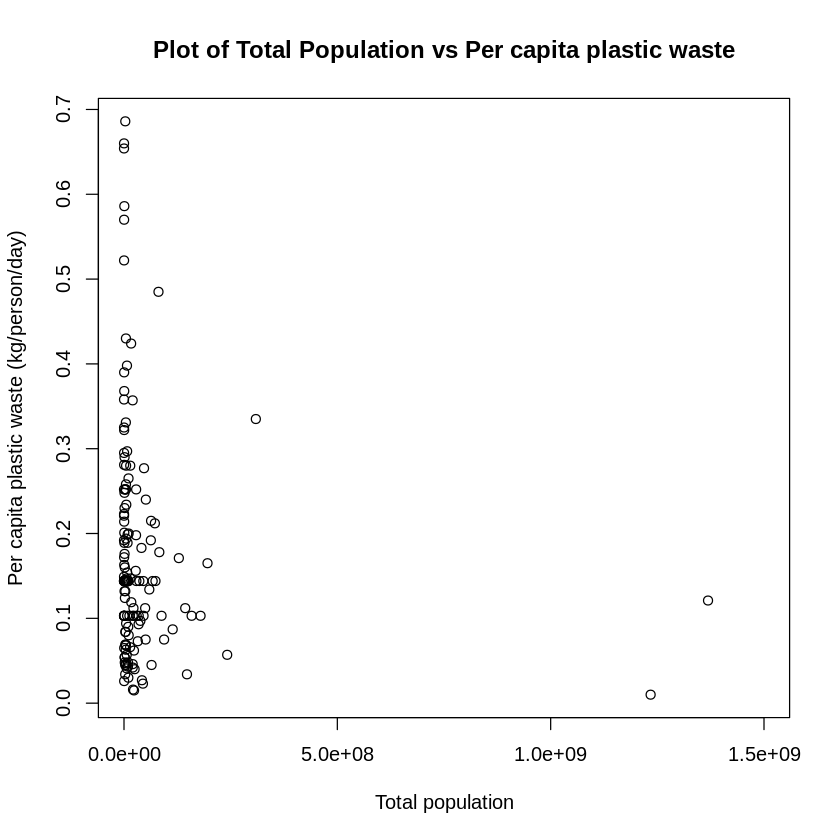

In [ ]:
# plot tp4 against pcpw4 to see if one variable correlates to another
plot(tp4, pcpw4, xlim = c(0, 1.5*10^9), xlab = "Total population", ylab = "Per capita plastic waste (kg/person/day)", 
main = "Plot of Total Population vs Per capita plastic waste")

Similarily, from our plot and descriptive analysis, we could not conclude if there is a correlation between total population and per capita mismanaged plastic waste.

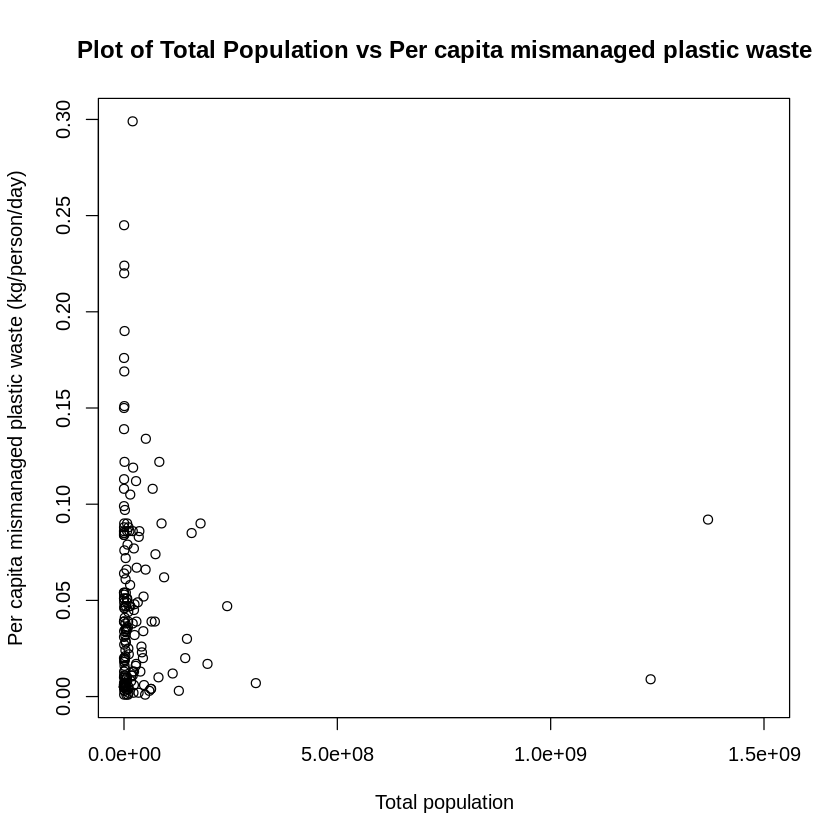

In [ ]:
# plot tp5 against pcmpw5 to see if one variable correlates to another
plot(tp5, pcmpw5, xlim = c(0, 1.5*10^9), xlab = "Total population", ylab = "Per capita mismanaged plastic waste (kg/person/day)", 
main = "Plot of Total Population vs Per capita mismanaged plastic waste")

# What are some follow up questions that could not be answered?
1) Is mismanaged waste also increasing from year 1950 to 2015?\
2) Could we observe some trends within countries or continents?

#  My follow-up questions in the near future

1. Could we legitimately exclude the outliers in our data frames?
1. Are there correlations between variables?
1. Could we map the data of countries to show plastic production distribution globally in R?

# References

1. How to Calculate the Mode in R (With Examples). (2022, June 9). Statology. https://www.statology.org/mode-in-r/